In this Post, we have done Logistic Regression using Sckit-learn and Logistic Regression using Gradient Descent Method


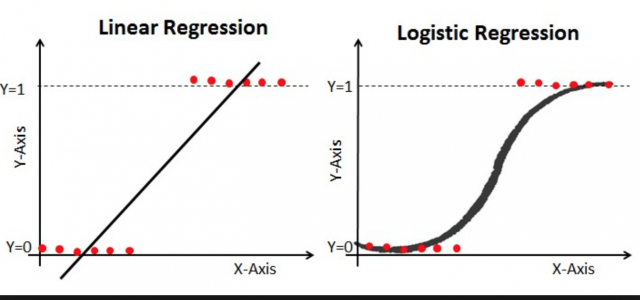

Logistic Regression is a classification Algorithmn used to predict the probabilities of the classes

we are using Gradient Descent Method to solve the logistic regression Problem.
Gradient Descent Method is used to minimize the loss by updating the coefficients(Known as backpropagation in deep learning)

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

## Loading the Data

In [2]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data['species']=data['species'].map(dict((y,x) for x,y in enumerate(data['species'].unique(),0)))

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
x=data.iloc[:,:-1]
y=data['species']
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,shuffle=True,random_state=7)

Using Scikit-learn

In [6]:
logreg1=LogisticRegression()
logreg1.fit(x_train1,y_train1)
logreg1.score(x_train1,y_train1)

0.9910714285714286

In [7]:
logreg1.coef_

array([[-0.42136288,  0.83261806, -2.2732954 , -0.98827692],
       [ 0.33445288, -0.70720047, -0.12536933, -0.8365677 ],
       [ 0.08691   , -0.12541759,  2.39866473,  1.82484462]])

In [8]:
logreg1.intercept_

array([  9.23813913,   3.83904251, -13.07718165])

In [9]:
from sklearn.datasets import make_classification
data1=make_classification(100,7,random_state=102)
x=data1[0]
y=data1[1]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,random_state=27)

In [11]:
logreg=LogisticRegression(penalty='none')
logreg.fit(x_train,y_train)
logreg.score(x_train,y_train)

0.8266666666666667

In [12]:
logreg.intercept_

array([-0.20376197])

In [13]:
logreg.coef_

array([[ 0.68419798, -0.0254034 ,  1.15608493,  0.07849724, -0.09098194,
         0.24861825,  0.39409049]])

Using Gradient Descent Method

In [14]:
def lr_gradien_descent(x,y,eta=0.001,max_iter=100,tol=0.001):
    from numpy import exp
    X=np.c_[np.ones(x.shape[0]),x]
    theta=np.zeros(X.shape[1]).reshape(-1,1)
    if max_iter!=None:
        for i in range(max_iter):
            pred=X@theta
            sig=1/(1+exp(-pred))
            derv=(X.T@(sig-y.reshape(-1,1))).reshape(-1,1)
            theta=theta-eta*derv
    elif max_iter==None:
        mag=100
        while mag>=tol:
            pred=X@theta
            sig=1/(1+exp(-pred))
            derv=(X.T@(sig-y.reshape(-1,1))).reshape(-1,1)
            theta=theta-eta*derv
            mag=np.sqrt(np.sum(derv**2))
    return theta

In [15]:
lr_gradien_descent(x_train,y_train,eta=0.002,max_iter=1000).flatten()

array([-0.20376648,  0.6841685 , -0.02540295,  1.15608405,  0.07854148,
       -0.09097268,  0.24862789,  0.39408933])

In [16]:
lr_gradien_descent(x_train,y_train,eta=0.002,max_iter=None,tol=0.01).flatten()

array([-0.20399922,  0.68305628, -0.02538319,  1.15583697,  0.08044301,
       -0.09047888,  0.24889936,  0.39397666])

In [30]:
logreg.intercept_

array([-0.20376197])

In [29]:
logreg.coef_

array([[ 0.68419798, -0.0254034 ,  1.15608493,  0.07849724, -0.09098194,
         0.24861825,  0.39409049]])

So we can see by compairing the coefficients and intercept of Logistic Regression using 
Scikit-learn package and Logistic Regression from scratch using Gradient Descent are the same

### Prediction

In [18]:
pred_data=np.c_[np.ones(x_train.shape[0]),x_train]

In [19]:
from numpy import exp
pred_train=1/(1+exp(-(pred_data@lr_gradien_descent(x_train,y_train,eta=0.002,max_iter=None,tol=0.01).flatten().reshape(-1,1))))

In [20]:
np.where(pred_train>=0.5,1,0).flatten()

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0])

In [22]:
logreg.predict(x_train)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0])

In [23]:
(np.where(pred_train>=0.5,1,0).flatten()==logreg.predict(x_train)).all()

True